# SIOT Coursework - Time-series Data Analysis

## Importing Libraries

In [192]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
## General packages for working with vectors, datasets, and visualization
import numpy as np
from numpy.random import normal, seed
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # This is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

## Packages for analyzing time series
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
## The path where we have datasets
print(os.listdir("."))

['.ipynb_checkpoints', 'DailySteps.csv', 'DailyTemperature.csv', 'SIOTCoursework.ipynb', 'Steps.csv', 'Temperature.csv', 'UnCleanData']


## Importing Data 

In [195]:
Temperature = pd.read_csv(
    './Temperature.csv',
    index_col='datetime',
    parse_dates=['datetime'])

Steps = pd.read_csv(
    './Steps.csv',
    index_col='datetime',
    parse_dates=['datetime'])

DailyTemperature = pd.read_csv(
    './DailyTemperature.csv',
    index_col='datetime',
    parse_dates=['datetime'])

DailySteps = pd.read_csv(
    './DailySteps.csv',
    index_col='datetime',
    parse_dates=['datetime'])

## Steps Data Analysis

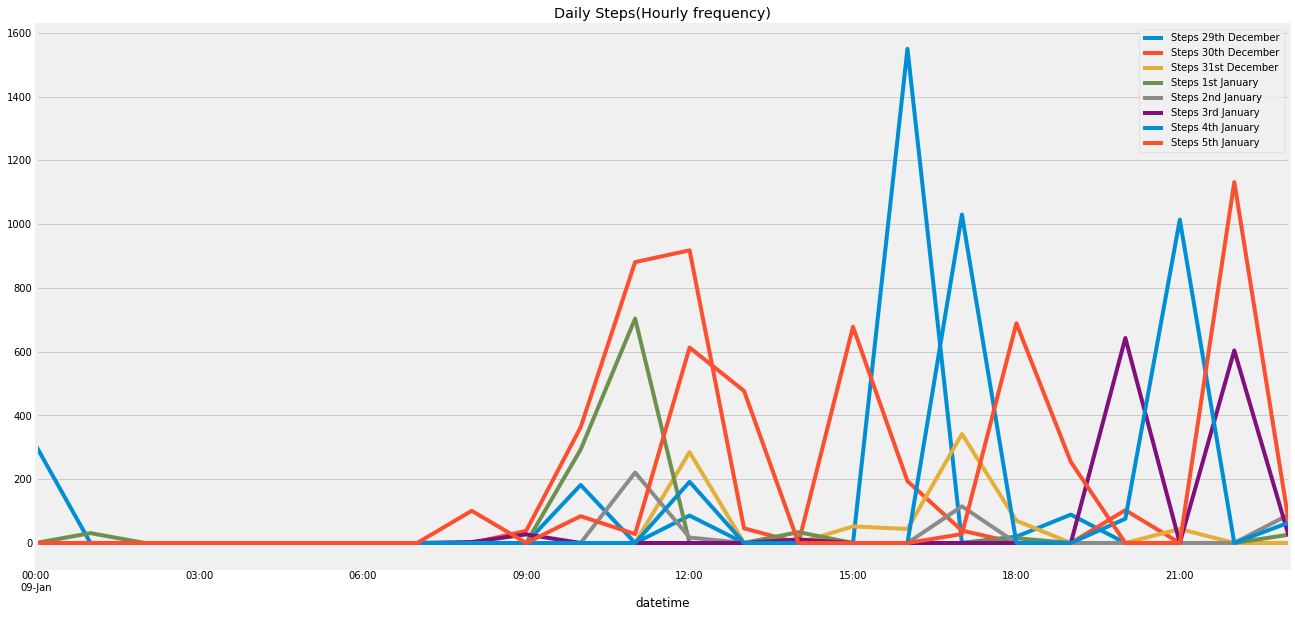

In [194]:
plt.figure(figsize=(20, 10))

DailySteps["Step count 2912"].asfreq('H').plot(label ="Steps 29th December")
DailySteps["Step count 3012"].asfreq('H').plot(label ="Steps 30th December") 
DailySteps["Step count 3112"].asfreq('H').plot(label ="Steps 31st December") 
DailySteps["Step count 0101"].asfreq('H').plot(label ="Steps 1st January") 
DailySteps["Step count 0201"].asfreq('H').plot(label ="Steps 2nd January")
DailySteps["Step count 0301"].asfreq('H').plot(label ="Steps 3rd January")
DailySteps["Step count 0401"].asfreq('H').plot(label ="Steps 4th January")
DailySteps["Step count 0501"].asfreq('H').plot(label ="Steps 5th January")
plt.title("Daily Steps(Hourly frequency)")
plt.legend()
plt.show()

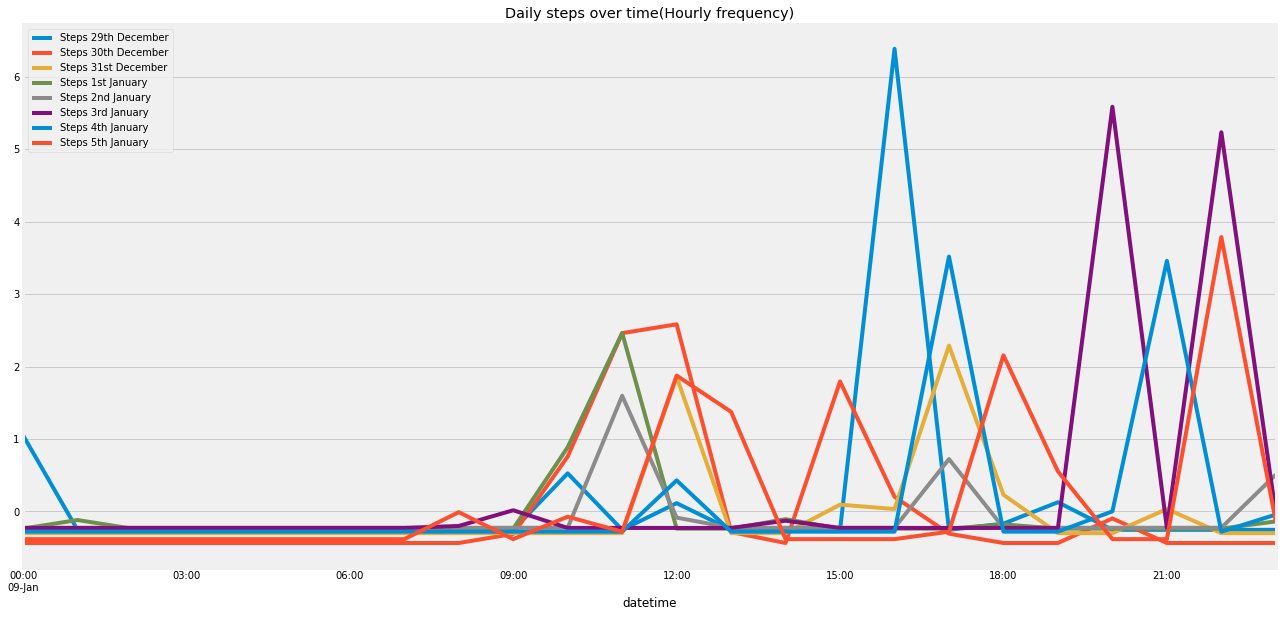

In [189]:
plt.figure(figsize=(20, 10))

NSteps2912 = (DailySteps["Step count 2912"] - np.mean(DailySteps["Step count 2912"]))/np.std(DailySteps["Step count 2912"])
NSteps3012 = (DailySteps["Step count 3012"] - np.mean(DailySteps["Step count 3012"]))/np.std(DailySteps["Step count 3012"])
NSteps3112 = (DailySteps["Step count 3112"] - np.mean(DailySteps["Step count 3112"]))/np.std(DailySteps["Step count 3112"])
NSteps0101 = (DailySteps["Step count 0101"] - np.mean(DailySteps["Step count 0101"]))/np.std(DailySteps["Step count 0101"])
NSteps0201 = (DailySteps["Step count 0201"] - np.mean(DailySteps["Step count 0201"]))/np.std(DailySteps["Step count 0201"])
NSteps0301 = (DailySteps["Step count 0301"] - np.mean(DailySteps["Step count 0301"]))/np.std(DailySteps["Step count 0301"])
NSteps0401 = (DailySteps["Step count 0401"] - np.mean(DailySteps["Step count 0401"]))/np.std(DailySteps["Step count 0401"])
NSteps0501 = (DailySteps["Step count 0501"] - np.mean(DailySteps["Step count 0501"]))/np.std(DailySteps["Step count 0501"])

NSteps2912.asfreq('H').plot(label ="Steps 29th December")
NSteps3012.asfreq('H').plot(label ="Steps 30th December") 
NSteps3112.asfreq('H').plot(label ="Steps 31st December") 
NSteps0101.asfreq('H').plot(label ="Steps 1st January") 
NSteps0201.asfreq('H').plot(label ="Steps 2nd January")
NSteps0301.asfreq('H').plot(label ="Steps 3rd January")
NSteps0401.asfreq('H').plot(label ="Steps 4th January")
NSteps0501.asfreq('H').plot(label ="Steps 5th January")
plt.title("Normalised Daily Steps(Hourly frequency)")
plt.legend()
plt.show()

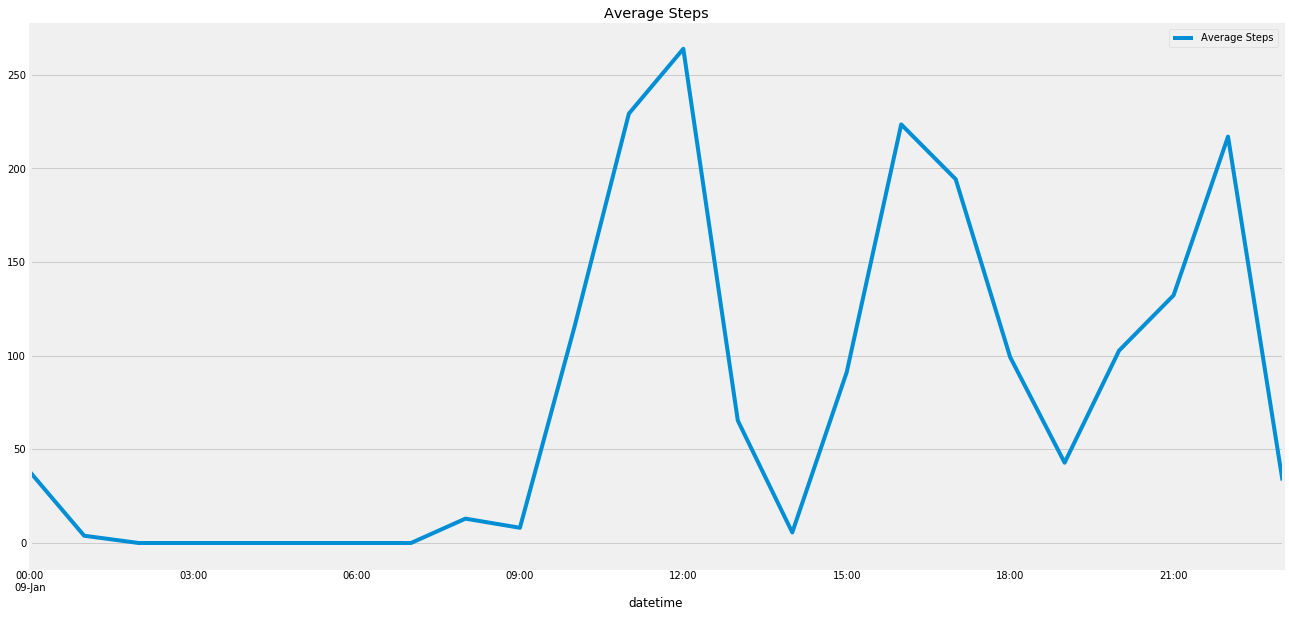

In [141]:
plt.figure(figsize=(20, 10))

city = "Step count"

DailySteps[city].asfreq('H').plot(label ="Average Steps")

plt.title("Average Steps")
plt.legend()
plt.show()

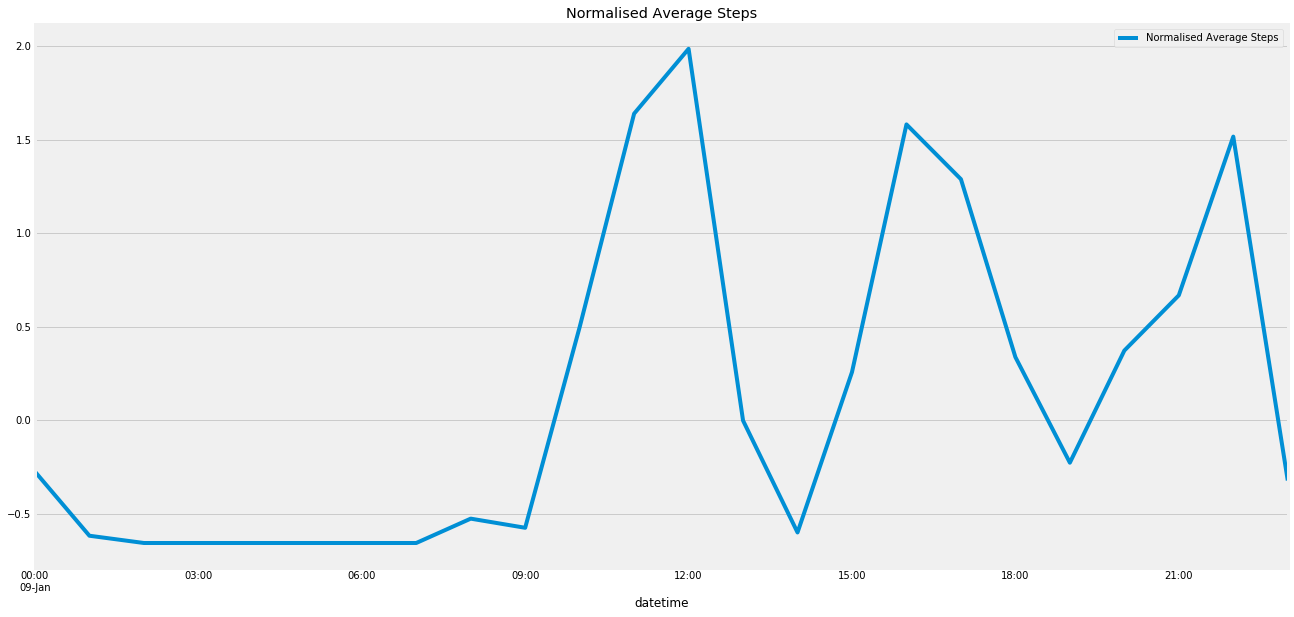

In [131]:
plt.figure(figsize=(20, 10))

city = "Step count"
NStepsAverage = (DailySteps[city] - np.mean(DailySteps[city]))/np.std(DailySteps[city])

NStepsAverage.asfreq('H').plot(label ="Normalised Average Steps")

plt.title("Normalised Average Steps")
plt.legend()
plt.show()

## Temperature Data Analysis

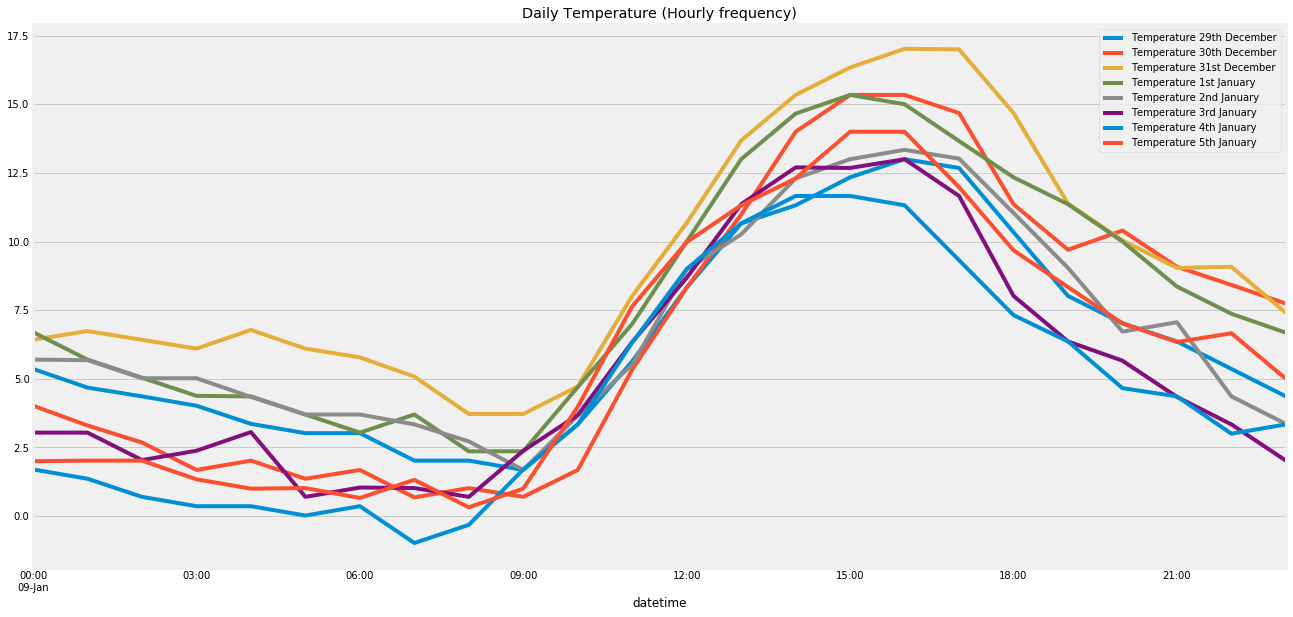

In [196]:
plt.figure(figsize=(20, 10))

DailyTemperature["Temperature 2912"].asfreq('H').plot(label ="Temperature 29th December")
DailyTemperature["Temperature 3012"].asfreq('H').plot(label ="Temperature 30th December") 
DailyTemperature["Temperature 3112"].asfreq('H').plot(label ="Temperature 31st December") 
DailyTemperature["Temperature 0101"].asfreq('H').plot(label ="Temperature 1st January") 
DailyTemperature["Temperature 0201"].asfreq('H').plot(label ="Temperature 2nd January")
DailyTemperature["Temperature 0301"].asfreq('H').plot(label ="Temperature 3rd January")
DailyTemperature["Temperature 0401"].asfreq('H').plot(label ="Temperature 4th January")
DailyTemperature["Temperature 0501"].asfreq('H').plot(label ="Temperature 5th January")
plt.title("Daily Temperature (Hourly frequency)")
plt.legend()
plt.show()

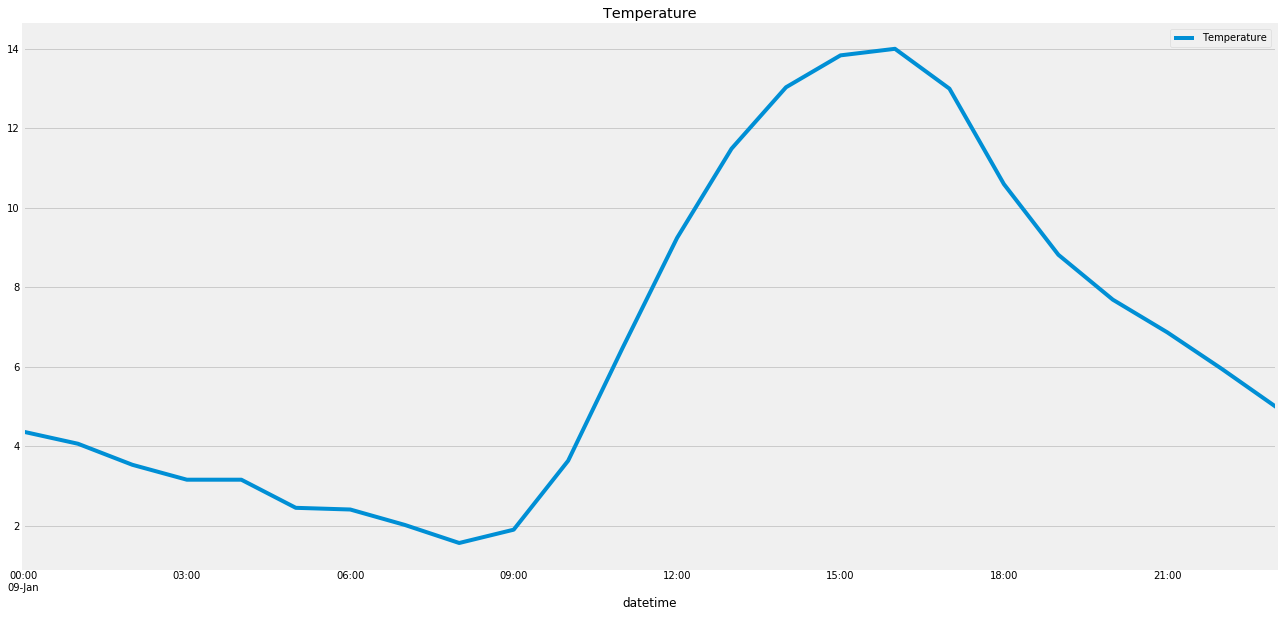

In [207]:
plt.figure(figsize=(20, 10))

DailyTemperature["Average Temperature"].asfreq('H').plot(label ="Temperature")

plt.title("Temperature")
plt.legend()
plt.show()

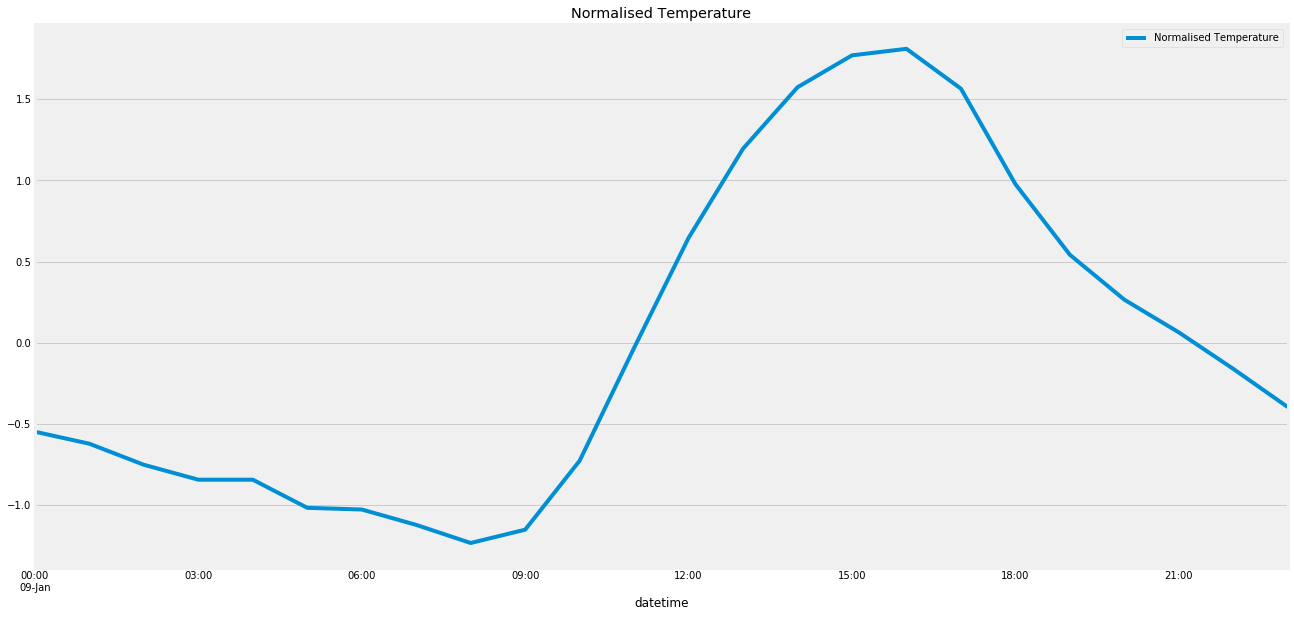

In [201]:
plt.figure(figsize=(20, 10))

NTemperatureAverage = (DailyTemperature["Average Temperature"] - np.mean(DailyTemperature["Average Temperature"]))/np.std(DailyTemperature["Average Temperature"])

NTemperatureAverage.asfreq('H').plot(label ="Normalised Temperature")

plt.title("Normalised Temperature")
plt.legend()
plt.show()

## Temperature vs Steps Data Analysis

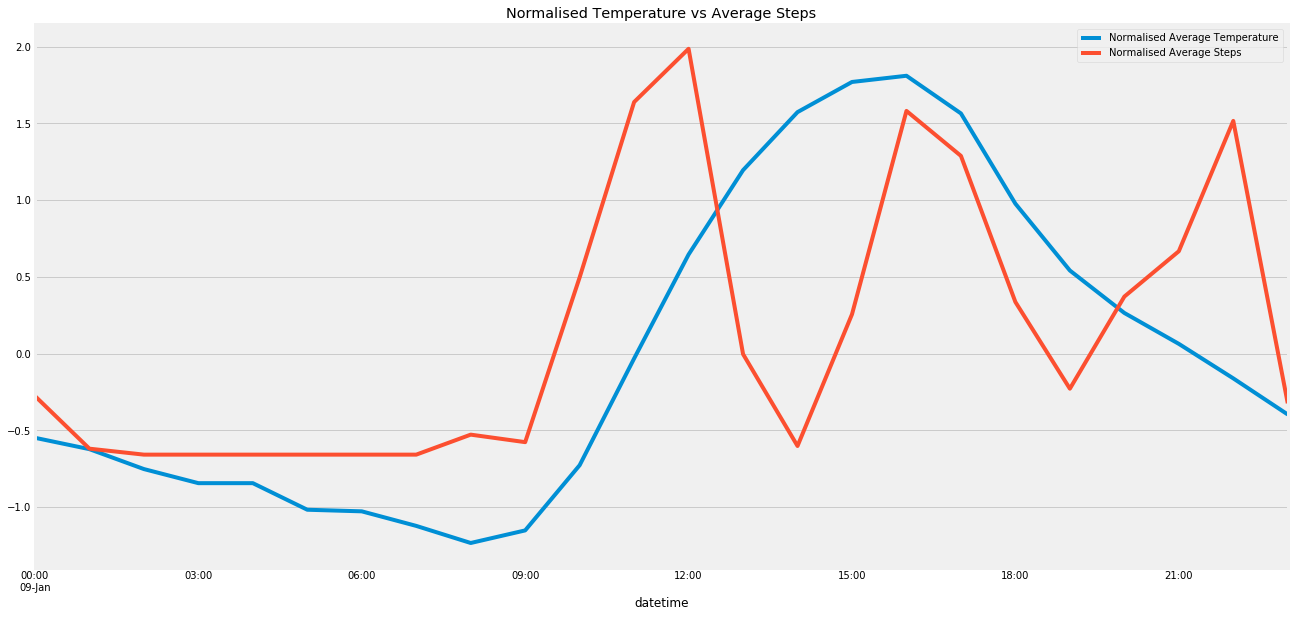

In [209]:
plt.figure(figsize=(20, 10))

NTemperatureAverage.asfreq('H').plot(label ="Normalised Average Temperature")
NStepsAverage.asfreq('H').plot(label ="Normalised Average Steps")

plt.title("Normalised Temperature vs Average Steps")
plt.legend()
plt.show()


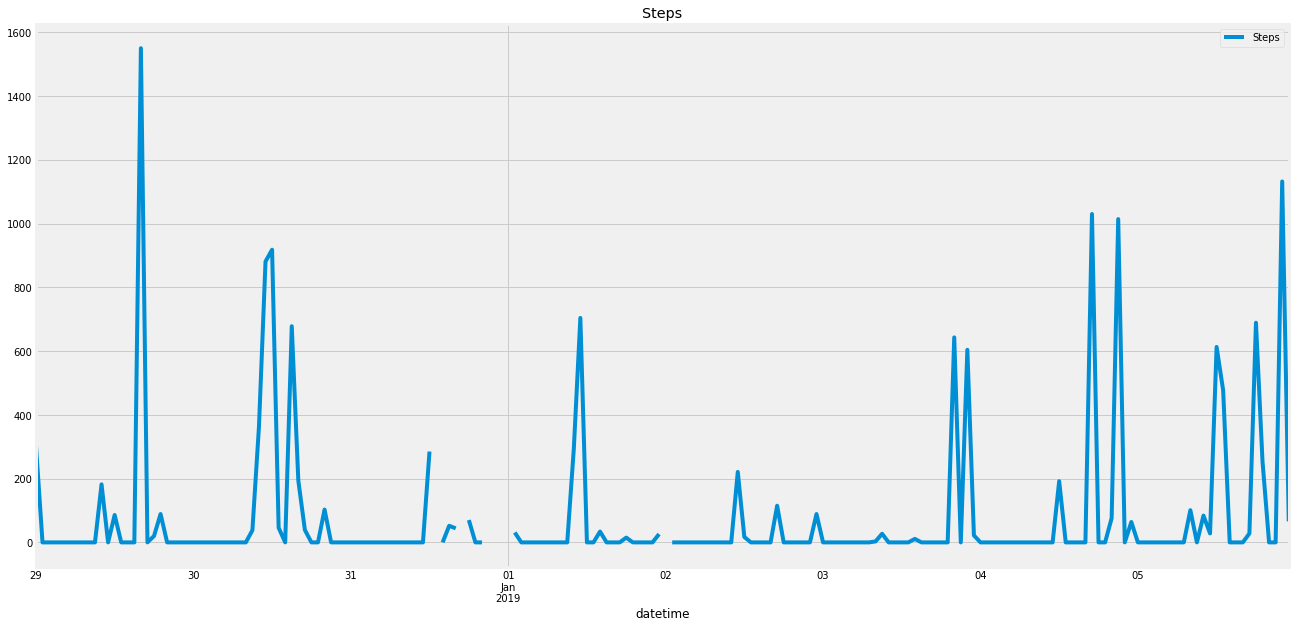

In [181]:
plt.figure(figsize=(20, 10))

Steps["Step count"].asfreq('H').plot(label ="Steps")

plt.title("Steps")
plt.legend()
plt.show()

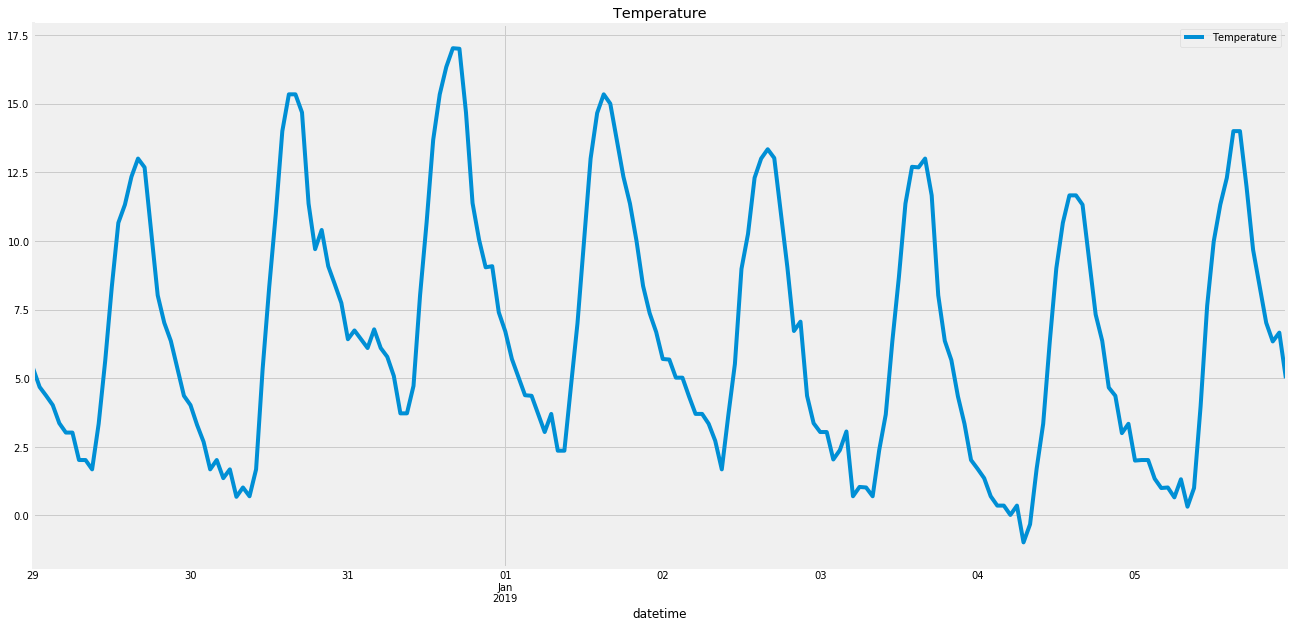

In [182]:
plt.figure(figsize=(20, 10))

Temperature["temperature"].asfreq('H').plot(label ="Temperature")

plt.title("Temperature")
plt.legend()
plt.show()

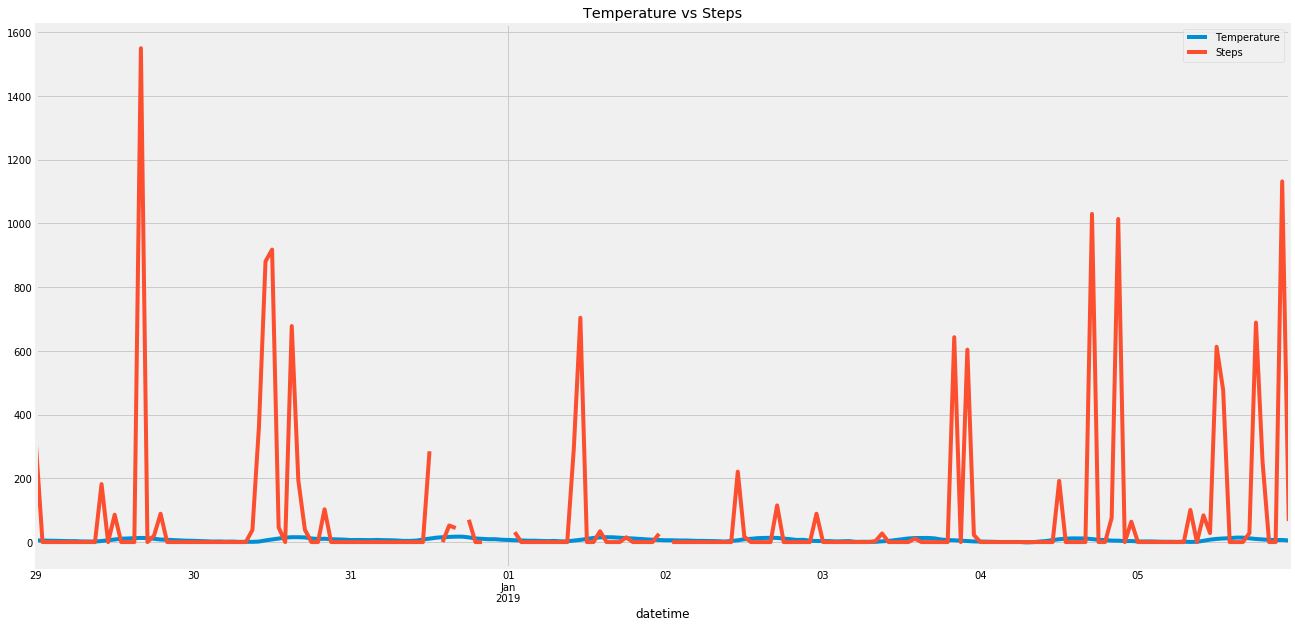

In [208]:
plt.figure(figsize=(20, 10))

Temperature["temperature"].asfreq('H').plot(label ="Temperature")
Steps["Step count"].asfreq('H').plot(label ="Steps")

plt.title("Temperature vs Steps")
plt.legend()
plt.show()

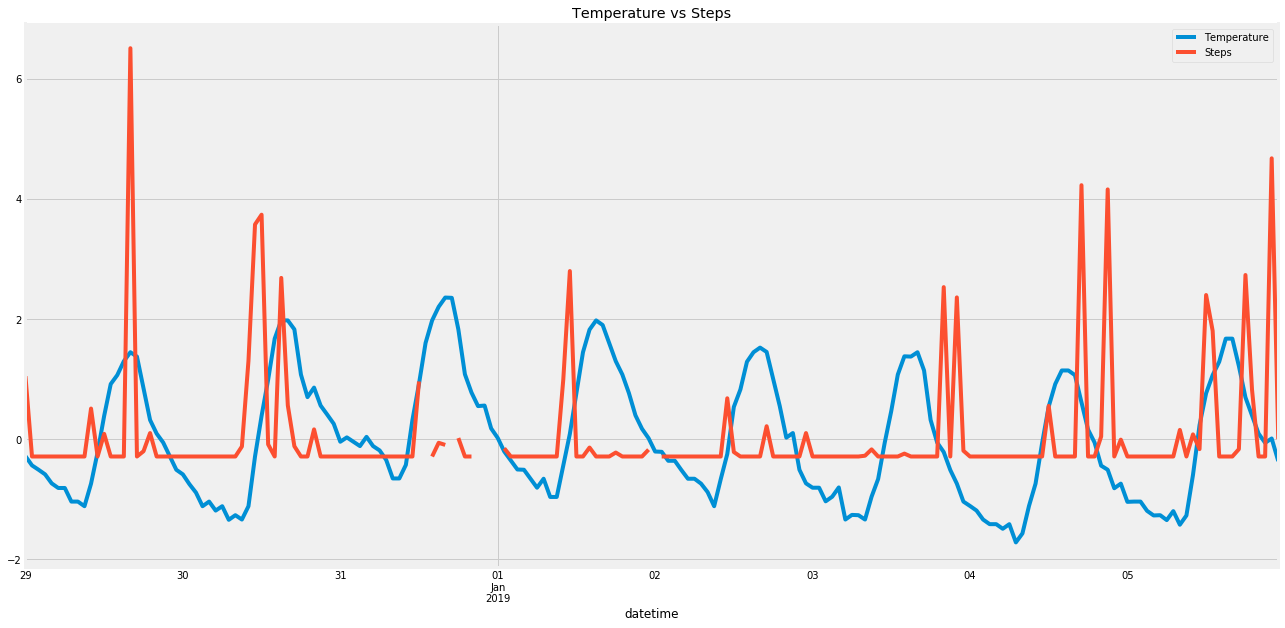

In [206]:
plt.figure(figsize=(20, 10))

NTemperature = (Temperature["temperature"] - np.mean(Temperature["temperature"]))/np.std(Temperature["temperature"])
NSteps = (Steps["Step count"] - np.mean(Steps["Step count"]))/np.std(Steps["Step count"])

NTemperature.asfreq('H').plot(label ="Temperature")
NSteps.asfreq('H').plot(label ="Steps")

plt.title("Temperature vs Steps")
plt.legend()
plt.show()

### Correlation Coefficient

In [204]:

df = pd.DataFrame({'A': NTemperatureAverage, 'B': NStepsAverage})
df['A'].corr(df['B'])


0.35862362358548994